# Constrained Layout Guide

In [1]:
import matplotlib.pyplot as plt

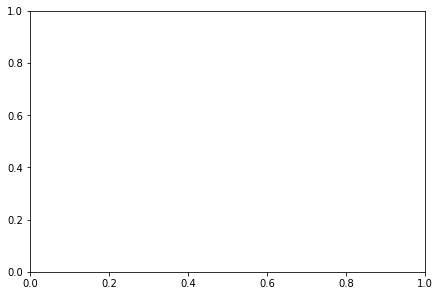

In [3]:
# subplot에서 property로 작동 가능
fig, ax = plt.subplots(constrained_layout = True)

In [4]:
plt.rcParams['figure.constrained_layout.use'] = True

# Simple Example

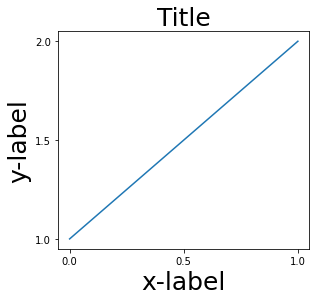

In [14]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.gridspec as gridspec
import numpy as np

plt.rcParams['savefig.facecolor'] = "0.8"
plt.rcParams['figure.figsize'] = 4.5, 4.
plt.rcParams['figure.max_open_warning'] = 50


def example_plot(ax, fontsize=12, hide_labels=False):
    ax.plot([1, 2])

    ax.locator_params(nbins=3)
    if hide_labels:
        ax.set_xticklabels([])
        ax.set_yticklabels([])
    else:
        ax.set_xlabel('x-label', fontsize=fontsize)
        ax.set_ylabel('y-label', fontsize=fontsize)
        ax.set_title('Title', fontsize=fontsize)

fig, ax = plt.subplots(constrained_layout=False)
example_plot(ax, fontsize=25)

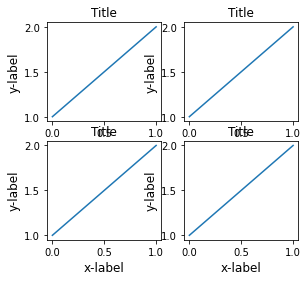

In [15]:
fig, axs = plt.subplots(2, 2, constrained_layout=False)
for ax in axs.flat:
    example_plot(ax)

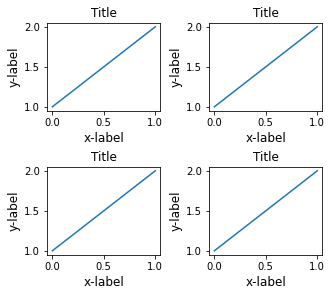

In [16]:
fig, axs = plt.subplots(2, 2, constrained_layout=True)
for ax in axs.flat:
    example_plot(ax)

# Colorbars

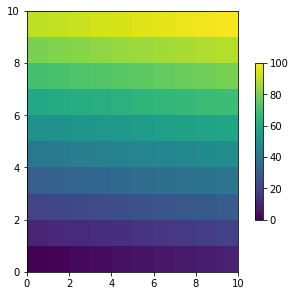

In [23]:
arr = np.arange(100).reshape((10, 10))

# 위의 note를 보세요. 이것은 모든 pcolormesh를 일관되게 만듭니다.
norm = mcolors.Normalize(vmin=0, vmax=100.)

pc_kwargs = {'rasterized': True, 'cmap': 'viridis', 'norm': norm}

fig, ax = plt.subplots(figsize=(4, 4), constrained_layout=True)
im = ax.pcolormesh(arr, **pc_kwargs)

fig.colorbar(im, ax=ax, shrink=0.6)



In [22]:
pc_kwargs

{'rasterized': True,
 'cmap': 'viridis',
 'norm': <matplotlib.colors.Normalize at 0x22b603b57c0>}

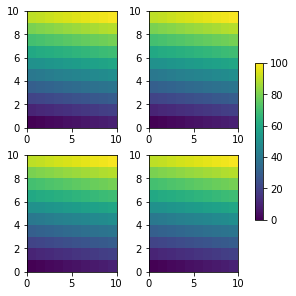

In [24]:
fig, axs = plt.subplots(2, 2, figsize=(4, 4), constrained_layout=True)
for ax in axs.flat:
    im = ax.pcolormesh(arr, **pc_kwargs)
fig.colorbar(im, ax=axs, shrink=0.6)

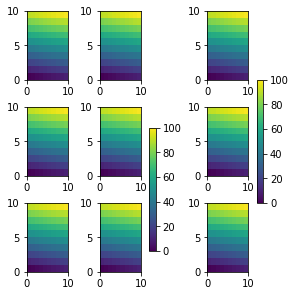

In [25]:
fig, axs = plt.subplots(3, 3, figsize=(4, 4), constrained_layout=True)
for ax in axs.flat:
    im = ax.pcolormesh(arr, **pc_kwargs)
fig.colorbar(im, ax=axs[1:, ][:, 1], shrink=0.8)
fig.colorbar(im, ax=axs[:, -1], shrink=0.6)

# Suptitle

Text(0.5, 0.98, 'Big Suptitle')

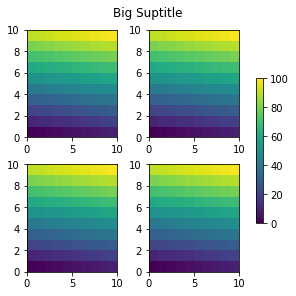

In [26]:
fig, axs = plt.subplots(2, 2, figsize=(4, 4), constrained_layout=True)
for ax in axs.flat :
    im = ax.pcolormesh(arr, **pc_kwargs)
fig.colorbar(im, ax=axs, shrink=0.6)
fig.suptitle('Big Suptitle')

# Legends

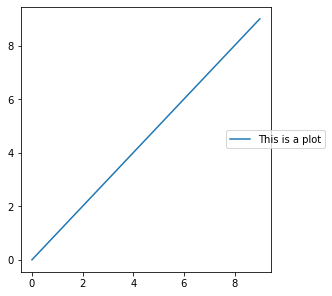

In [35]:
# axes legend는 constrained_layout이 먹히지만 fig legend는 안먹힌다

fig, ax = plt.subplots(constrained_layout=True)
ax.plot(np.arange(10), label='This is a plot')
ax.legend(loc='center left', bbox_to_anchor=(0.8, 0.5))

# bounding box = Bbox

# 안먹힌다는 것을 볼 수 있다.

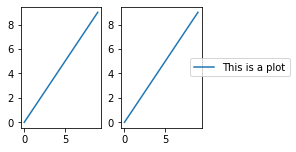

In [37]:
fig, axs = plt.subplots(1, 2, figsize=(4, 2), constrained_layout=True)
axs[0].plot(np.arange(10))
axs[1].plot(np.arange(10), label='This is a plot')
axs[1].legend(loc='center left', bbox_to_anchor=(0.8, 0.5))

# 이러면 서브플롯 자리를 뺏어버린다.

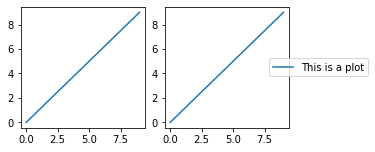

In [46]:
# 이러지 않기 위해서는 설정이 필요하다

fig, axs = plt.subplots(1, 2, figsize=(4, 2), constrained_layout=True)

axs[0].plot(np.arange(10))
axs[1].plot(np.arange(10), label='This is a plot')
leg = axs[1].legend(loc='center left', bbox_to_anchor=(0.8, 0.5))
# 한번만 제한된 layout이 실행되게 한다.
leg.set_in_layout(False)

# show 하기전에 layout을 끄기
fig.canvas.draw()

# 우리는 bbox_inches='tight' 로 계산된 legend를 원한다.
leg.set_in_layout(True)

# 이 지점에서 layout이 변하기 원치 않는다.
fig.set_constrained_layout(False)



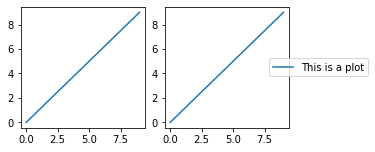

In [43]:
fig, axs = plt.subplots(1, 2, figsize=(4, 2), constrained_layout=True)
axs[0].plot(np.arange(10))
lines = axs[1].plot(np.arange(10), label='This is a plot')
labels = [l.get_label() for l in lines]
leg = fig.legend(lines, labels, loc='center left',
                 bbox_to_anchor=(0.8, 0.5), bbox_transform=axs[1].transAxes)
fig.savefig('constrained_layout_2b.png',
            bbox_inches='tight', dpi=100)

# Padding and Spacing

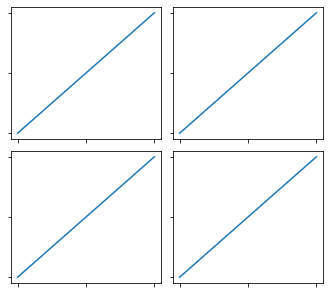

In [47]:
fig, axs = plt.subplots(2, 2, constrained_layout=True)
for ax in axs.flat:
    example_plot(ax, hide_labels=True)
fig.set_constrained_layout_pads(w_pad=4 / 72, h_pad=4 / 72, hspace=0, wspace=0)

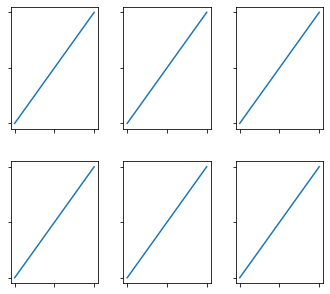

In [48]:
fig, axs = plt.subplots(2, 3, constrained_layout=True)
for ax in axs.flat:
    example_plot(ax, hide_labels=True)
fig.set_constrained_layout_pads(w_pad=4 / 72, h_pad=4 / 72, hspace=0.2,
                                wspace=0.2)

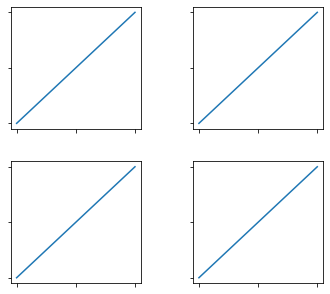

In [51]:
fig, axs = plt.subplots(2, 2, constrained_layout=True,
                        gridspec_kw={'wspace': 0.3, 'hspace': 0.2})
for ax in axs.flat:
    example_plot(ax, hide_labels=True)
# 그리드 spec에서의 공간이 더 중요하므로 
# constrained layout은 힘을 쓰지 못합니다.
fig.set_constrained_layout_pads(w_pad=4 / 72, h_pad=4 / 72, hspace=0.0,
                                wspace=0.0)
plt.show()

# gridspec에서 wspace, hspace와의 관계 
# constrained_layout <<< gridspec이다.

 # Spacing with colorbars